## Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


#### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [508]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [509]:
#importing the dataset
data = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [510]:
#checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Some categorical variables should be encoded for building the model. There seems to be no missing values in the dataset.

In [511]:
#checking if there's any missing values
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [512]:
#shape of the dataset
shape= data.shape
print(shape)

(32560, 15)


Observation:
- There are no null values in the dataset.
- The dataset has 3260 rows with 14 columns
- 13 features & 1 binomical target varibale

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


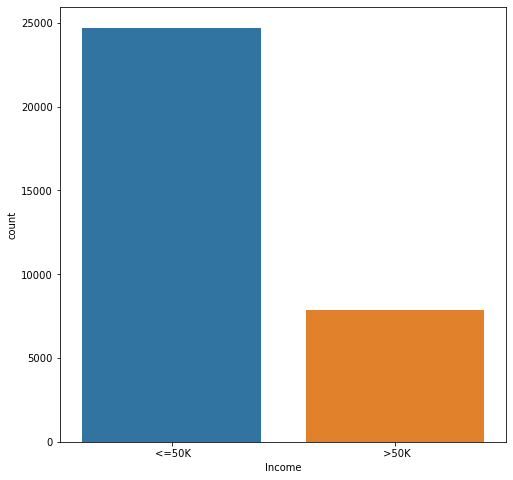

In [513]:
#checking if there's imbalance variable in the target varibale
print(data.Income.value_counts())
plt.figure(figsize=(8,8),facecolor='white')
sns.countplot(x='Income',data=data)
plt.show()

The target varibalesm "Income" has,
- people with income of <=50k
- people with income of >50k


Our dataset is imbalanced. So, if we build the model based on this observatins. our model will be biased. Thus we need to make the dataset balanced.

In [514]:
#descriptive statistics
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Capital_gain, capital_loss has 0s in 4 of 5 summary points. Lets visualize and see each and every varibale (both numercial and categorical)

In [515]:
#splitting the numercial and categorical features
numerical_data= data[['Age','Fnlwgt','Capital_gain', 'Capital_loss', 'Hours_per_week']]
categorical_data=pd.DataFrame()

for column in data.columns:
    if column not in numercial_data:
        categorical_data[column]= data[column]

#removing the income column because its a target variable
categorical_data.drop(columns='Income',inplace=True)
print(f'Numercial features:\n{numercial_data.columns}\n\n\nCategorical features:\n{categorical_data.columns}')

Numercial features:
Index(['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week'], dtype='object')


Categorical features:
Index(['Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country'],
      dtype='object')


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


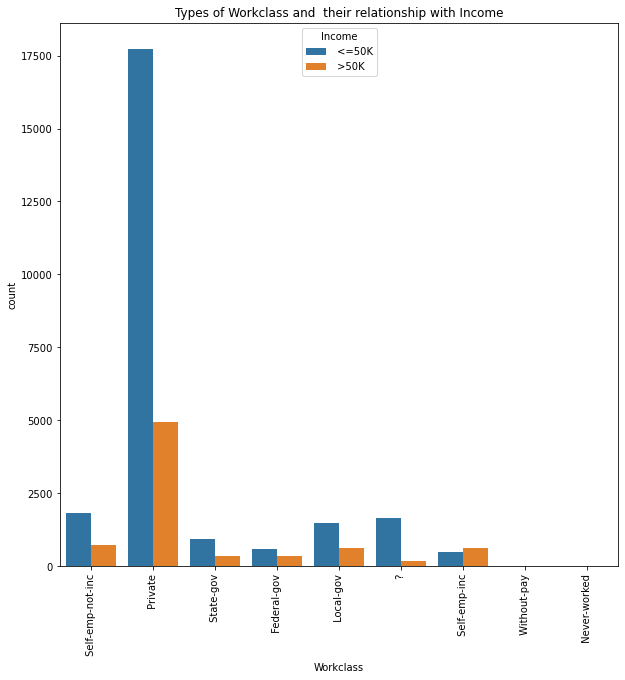

In [516]:
#seeing the number of classes in each categorical variables using countplot
#also the relationship between each variable with Income
plt.figure(figsize=(10,10),facecolor='white')
print(data.Workclass.value_counts())
sns.countplot(x='Workclass',hue='Income',data=data)
plt.title('Types of Workclass and  their relationship with Income')
plt.xticks(rotation=90)
plt.show()

- While searching for missing values in the dataset it shows that there are no missing values. But as you can see there is a value "?" in the Workclass column which is a missing value. Lets see for all the categorical variable is there any similar value, then we will impute them.
- There are 1836 values missing in the workclass column.
- There are lot of people working at private company earing less than 50k and more than 50k. 

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


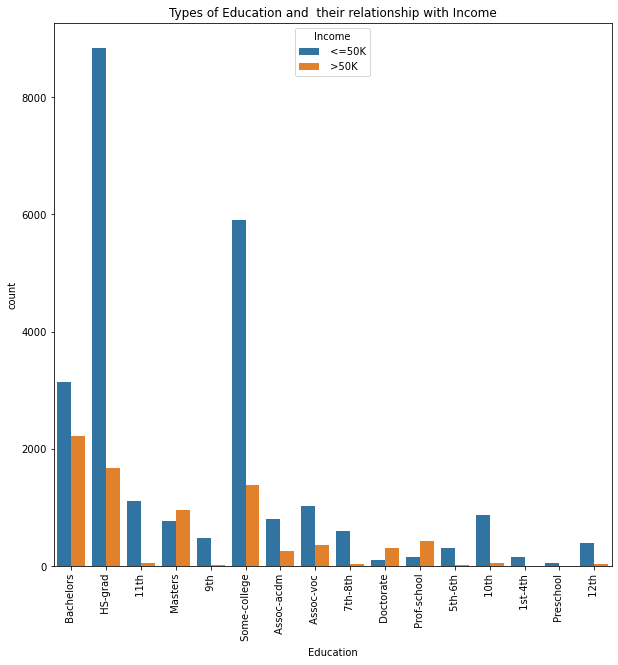

In [517]:
plt.figure(figsize=(10,10),facecolor='white')
print(data.Education.value_counts())
sns.countplot(x='Education',hue='Income',data=data)
plt.title('Types of Education and  their relationship with Income')
plt.xticks(rotation=90)
plt.show()

- Most People who earn greater than 50K had studied Bachelors as their highest education.
- likewise, Many people who's earning is less than or equal to 50k had studied HS-grad & some college.

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64


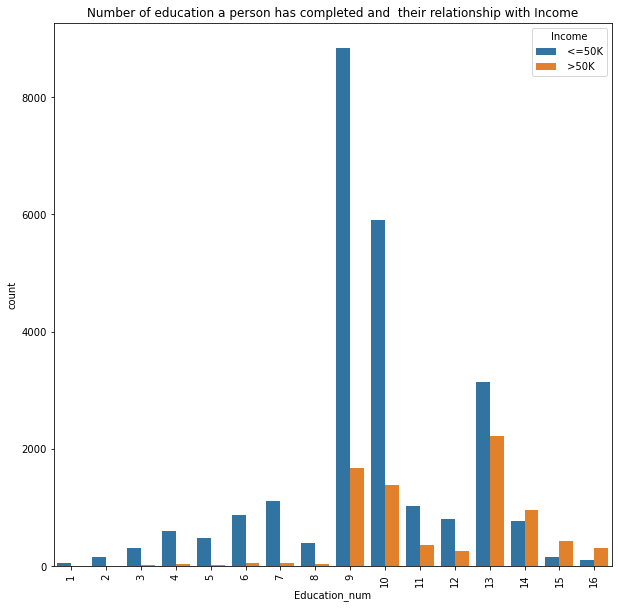

In [518]:
plt.figure(figsize=(10,10),facecolor='white')
print(data.Education_num.value_counts())
sns.countplot(x='Education_num',hue='Income',data=data)
plt.title('Number of education a person has completed and  their relationship with Income')
plt.xticks(rotation=90)
plt.show()

As you can see more the number of education higher the income.

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


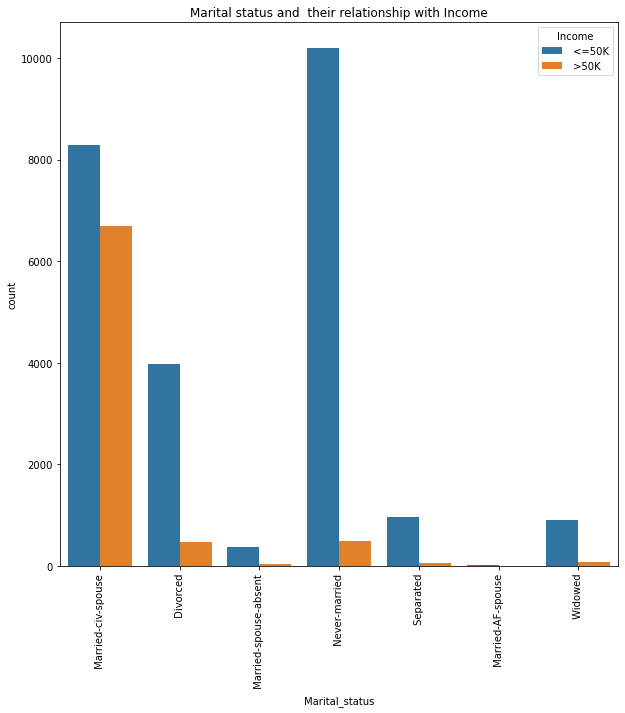

In [519]:
plt.figure(figsize=(10,10),facecolor='white')
print(data.Marital_status.value_counts())
sns.countplot(x='Marital_status',hue='Income',data=data)
plt.title('Marital status and  their relationship with Income')
plt.xticks(rotation=90)
plt.show()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


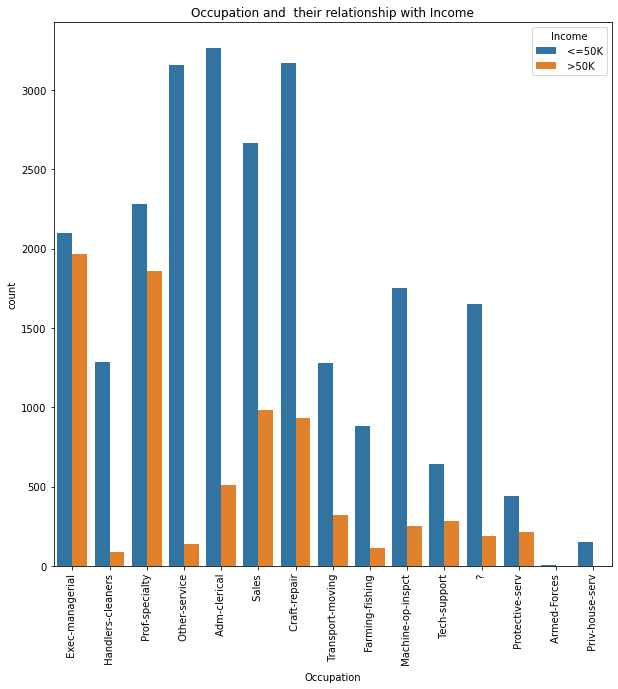

In [520]:
plt.figure(figsize=(10,10),facecolor='white')
print(data.Occupation.value_counts())
sns.countplot(x='Occupation',hue='Income',data=data)
plt.title('Occupation and  their relationship with Income')
plt.xticks(rotation=90)
plt.show()

- Occupation column also has the missing values represented in "?", with 1843 missing values.
- Most People who earn greater than 50K are working as Exec-managrial, Prof-speciality & Sales .
- Most people who's earning is less than or equal to 50k have Adm-clerical, sales, Craft-repair & other service.

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


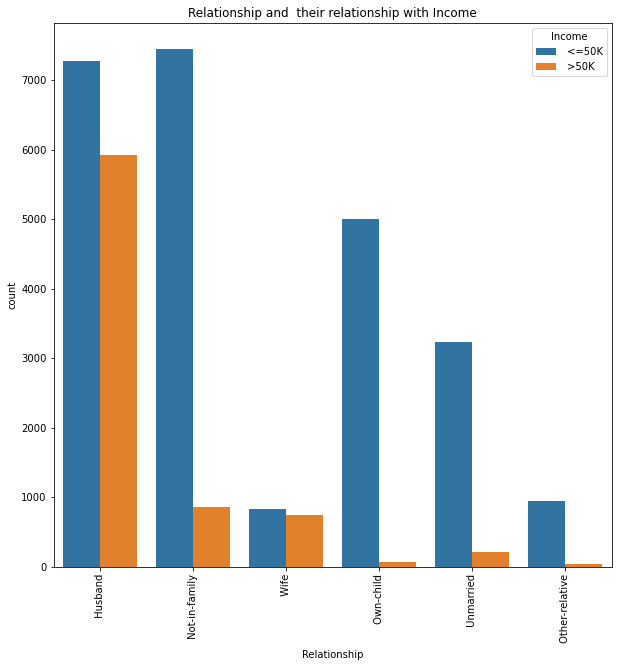

In [521]:
plt.figure(figsize=(10,10),facecolor='white')
print(data.Relationship.value_counts())
sns.countplot(x='Relationship',hue='Income',data=data)
plt.title('Relationship and  their relationship with Income')
plt.xticks(rotation=90)
plt.show()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


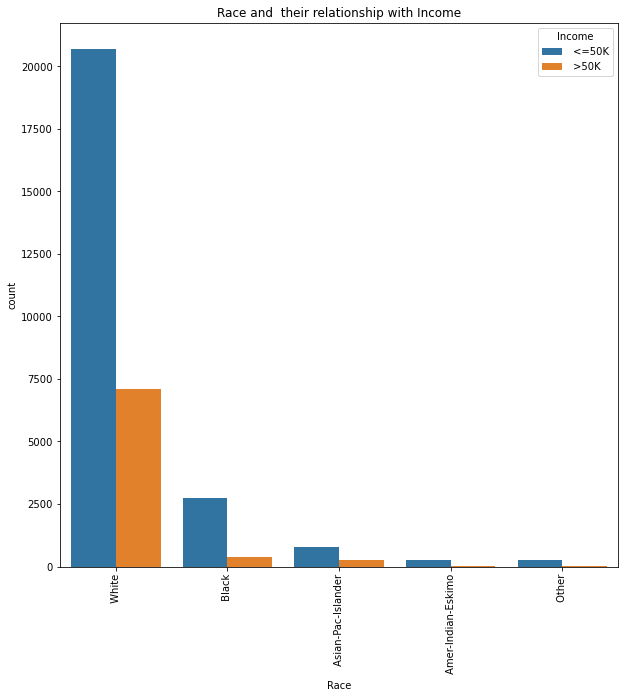

In [522]:
plt.figure(figsize=(10,10),facecolor='white')
print(data.Race.value_counts())
sns.countplot(x='Race',hue='Income',data=data)
plt.title('Race and  their relationship with Income')
plt.xticks(rotation=90)
plt.show()

 Male      21789
 Female    10771
Name: Sex, dtype: int64


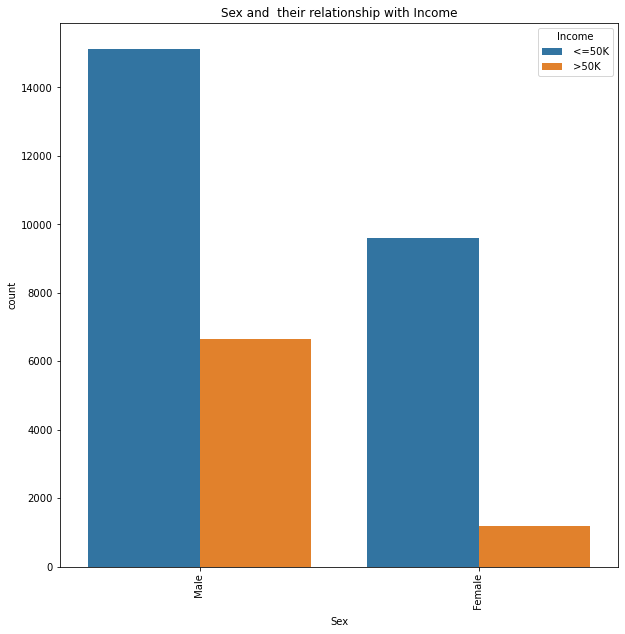

In [523]:
plt.figure(figsize=(10,10),facecolor='white')
print(data.Sex.value_counts())
sns.countplot(x='Sex',hue='Income',data=data)
plt.title('Sex and  their relationship with Income')
plt.xticks(rotation=90)
plt.show()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

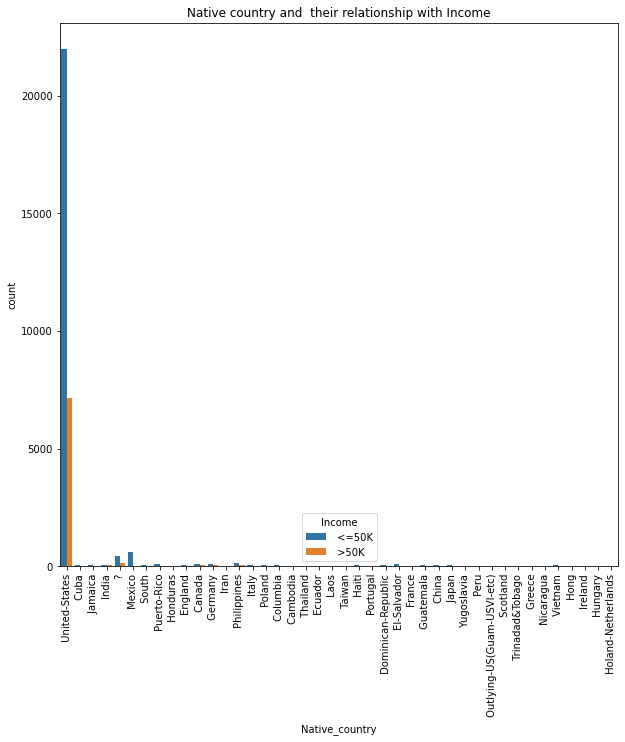

In [524]:
plt.figure(figsize=(10,10),facecolor='white')
print(data.Native_country.value_counts())
sns.countplot(x='Native_country',hue='Income',data=data)
plt.title('Native country and  their relationship with Income')
plt.xticks(rotation=90)
plt.show()

- There are 583 missing values in the native country variable 
- Most of the People who's native is United States earn both greater and lesser than 50k.

The missing values can be replaced by imputing each column using mode. But it may make the datset bias. Since the dataset has more observation we will remove the observations that are missing.

In [525]:
#Dropping the observations which has the value"?" in above mentioned columns
data.drop(index=data[data.Workclass==' ?'].index, inplace=True)
#dropping missing values in native country
data.drop(index=data[data.Native_country==' ?'].index, inplace=True)
#dropping missing values in Occupation
data.drop(index=data[data.Occupation==' ?'].index, inplace=True)
data.reset_index(drop=True,inplace=True)
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [527]:
#splitting the numercial and categorical features
numerical_data= data[['Age','Fnlwgt','Capital_gain', 'Capital_loss', 'Hours_per_week']]
categorical_data=pd.DataFrame()

for column in data.columns:
    if column not in numercial_data:
        categorical_data[column]= data[column]

In [528]:
#percentage of dataset lost
print(f'{(((shape[0])-(data.shape[0]))/(shape[0]))*100}% of the datset has been removed due to missing values.')

7.367936117936118% of the datset has been removed due to missing values.


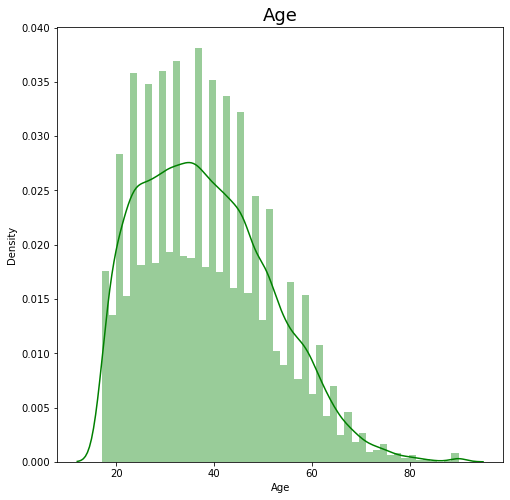

In [529]:
#seeing the data distribution of numerical variables 
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(data.Age,color='green')
plt.title("Age",fontsize=18)
plt.show()

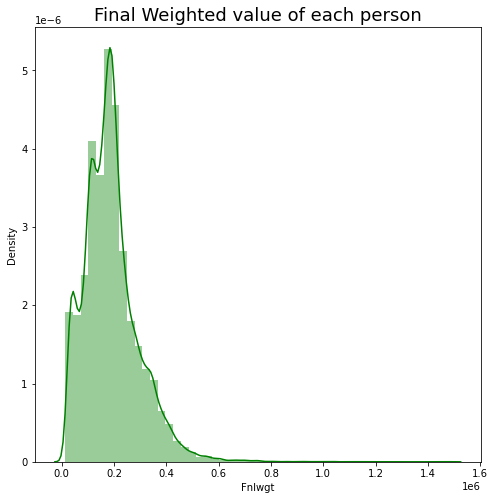

In [530]:
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(data.Fnlwgt,color='green')
plt.title("Final Weighted value of each person",fontsize=18)
plt.show()

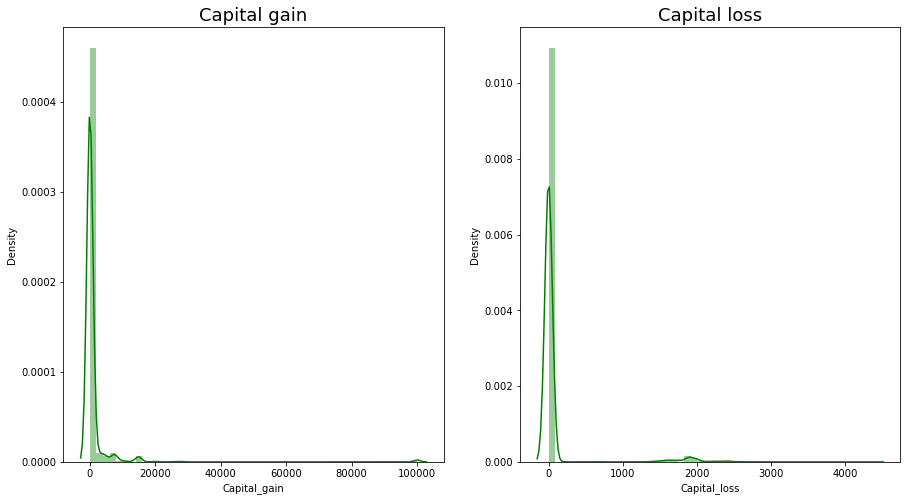

In [531]:
plt.figure(figsize=(15,8),facecolor='white')
plt.subplot(1,2,1)
sns.distplot(data.Capital_gain,color='green')
plt.title("Capital gain",fontsize=18)
plt.subplot(1,2,2)
sns.distplot(data.Capital_loss,color='green')
plt.title("Capital loss",fontsize=18)
plt.show()

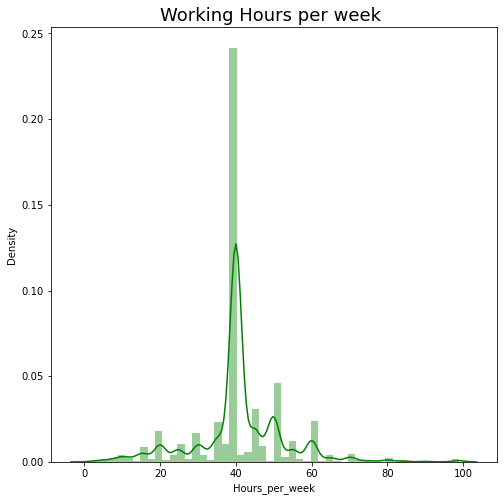

In [532]:
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(data.Hours_per_week,color='green')
plt.title("Working Hours per week ",fontsize=18)
plt.show()

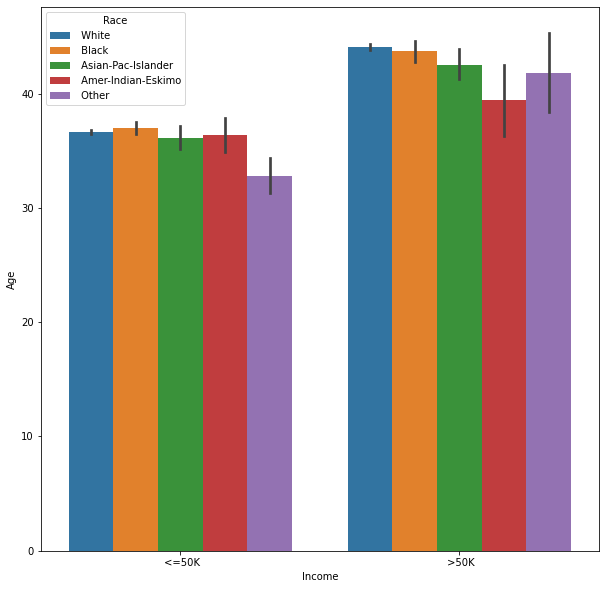

In [533]:
plt.figure(figsize=(10,10),facecolor='white')
sns.barplot(x='Income',y='Age',data=data,hue='Race')
plt.show()

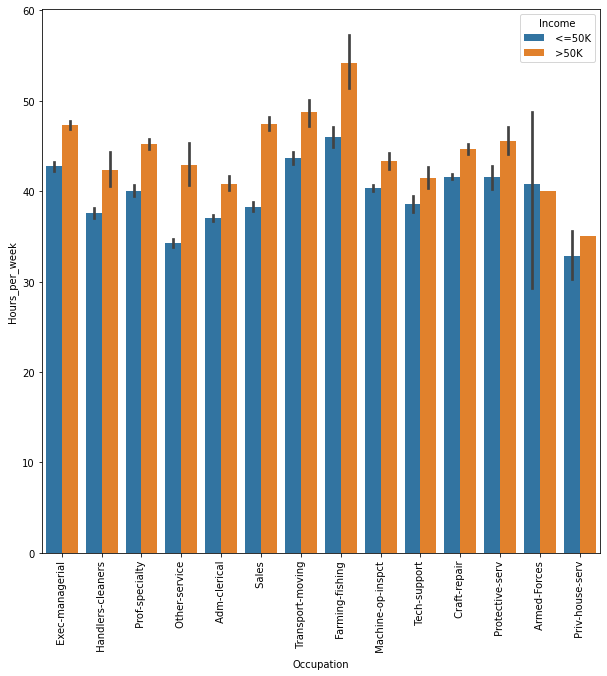

In [534]:
plt.figure(figsize=(10,10),facecolor='white')
sns.barplot(x='Occupation',y='Hours_per_week',data=data,hue='Income')
plt.xticks(rotation=90)
plt.show()

In [535]:
#Encoding the target variables which is binomial
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

data['Income']= encoder.fit_transform(data['Income'])

In [536]:
#checking skewness in the numerical variables
numerical_data.skew()

Age                0.530223
Fnlwgt             1.459212
Capital_gain      11.902511
Capital_loss       4.526294
Hours_per_week     0.330856
dtype: float64

In [537]:
from sklearn.preprocessing import power_transform
numercial_data= pd.DataFrame(power_transform(numerical_data), columns=numercial_data.columns)
for column in numerical_data.columns:
    data[column]=numerical_data[column]

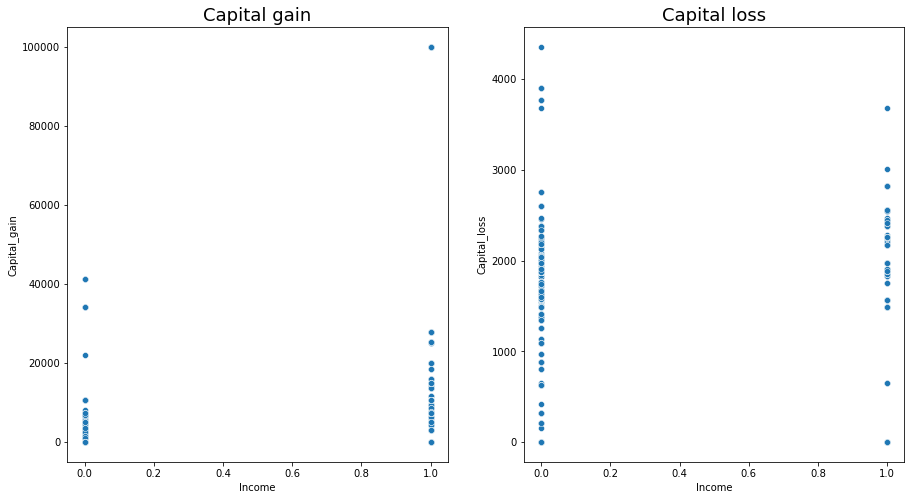

In [538]:
plt.figure(figsize=(15,8),facecolor='white')
plt.subplot(1,2,1)
sns.scatterplot(x='Income',y='Capital_gain',data=data)
plt.title("Capital gain",fontsize=18)
plt.subplot(1,2,2)
sns.scatterplot(x='Income',y='Capital_loss',data=data)
plt.title("Capital loss",fontsize=18)
plt.show()

skewness has been reduced. The outliers in the some columns is important for predicting the Income of the person. So we will let them be in the dataset. Lets create dummies for the categorical variable.

In [539]:
data.shape

(30161, 15)

In [540]:
#creating dummies for the categorical variable
data = pd.get_dummies(data,drop_first=True)

In [541]:
data.shape

(30161, 97)

In [542]:
#scaling the numerical variables in the dataset
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()

scaling= pd.DataFrame(scalar.fit_transform(data[numercial_data.columns]),columns=numercial_data.columns)
for column in scaling.columns:
    data[column]= scaling[column]

Building the Model

In [545]:
#splitting the dataset
x= data.drop(columns='Income')
y=data.Income

In [546]:
#importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [549]:
#selecting the best random state with best score
max_score=0
trainscore=0
maxrs=0
for i in range(0,100):
    lr= LogisticRegression()
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    train_pred= lr.predict(x_train)
    test_pred= lr.predict(x_test)
    score= accuracy_score(y_test,test_pred)
    trainscore= accuracy_score(y_train,train_pred)
    if round(score,2)==round(trainscore,2):
        print(f'At random state {i} the training accuracy is {trainscore} and test accuracy is {score}')

At random state 0 the training accuracy is 0.8488063660477454 and test accuracy is 0.8485611987800027
At random state 2 the training accuracy is 0.849867374005305 and test accuracy is 0.8473677231136454
At random state 3 the training accuracy is 0.8495137046861185 and test accuracy is 0.8488264155947487
At random state 4 the training accuracy is 0.8509283819628647 and test accuracy is 0.84537859700305
At random state 6 the training accuracy is 0.849867374005305 and test accuracy is 0.8478981567431375
At random state 7 the training accuracy is 0.8468611847922193 and test accuracy is 0.8521416257790744
At random state 8 the training accuracy is 0.8503536693191865 and test accuracy is 0.8472351147062723
At random state 9 the training accuracy is 0.847789566755084 and test accuracy is 0.8526720594085665
At random state 10 the training accuracy is 0.8494694960212201 and test accuracy is 0.8513459753348362
At random state 12 the training accuracy is 0.8495137046861185 and test accuracy is 0.

At random state 95 the training accuracy is 0.8492042440318303 and test accuracy is 0.8473677231136454
At random state 96 the training accuracy is 0.8499557913351017 and test accuracy is 0.8477655483357645
At random state 98 the training accuracy is 0.847789566755084 and test accuracy is 0.8512133669274632


Selecting the best random state as 41 which gives a accuracy of about 85% in both test and train dataset.

In [554]:
#splitting the dataset into train and test with the best random state
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=41)

In [555]:
y_train.value_counts()

0    16962
1     5658
Name: Income, dtype: int64

In [556]:
#Undersampling Technique for imbalanced dataset
from imblearn.under_sampling import NearMiss
imb= NearMiss(0.75)
x_train,y_train= imb.fit_resample(x_train,y_train)

In [557]:
y_train.value_counts()

0    7544
1    5658
Name: Income, dtype: int64

In [558]:
#selecting the best k-fold for cross validation score
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cvs= cross_val_score(lr,x,y,cv=j)
    cvs_mean= cvs.mean()
    print(f'At cross fold {j} cross value score is {cvs_mean}')

At cross fold 2 cross value score is 0.847319433063227
At cross fold 3 cross value score is 0.8475847288595957
At cross fold 4 cross value score is 0.847949419389741
At cross fold 5 cross value score is 0.847816809712804
At cross fold 6 cross value score is 0.8478498044503177
At cross fold 7 cross value score is 0.8483806154311496
At cross fold 8 cross value score is 0.8482147893986427
At cross fold 9 cross value score is 0.848015937171812


Cross fold value 7 gives best score. so, we select 7.

In [559]:
#LogisticRegression

LR= LogisticRegression()
LR.fit(x_train,y_train)
y_pred= LR.predict(x_test)

#cross valuation
cvs= cross_val_score(LR,x,y,cv=7)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.8321177562657472
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.8483806154311496
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[5030  661]
 [ 605 1245]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      5691
           1       0.65      0.67      0.66      1850

    accuracy                           0.83      7541
   macro avg       0.77      0.78      0.78      7541
weighted avg       0.83      0.83      0.83      7541



In [560]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)

#cross valuation
cvs= cross_val_score(rf,x,y,cv=7)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.8103699774565708
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.8512320369754541
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[4857  834]
 [ 596 1254]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      5691
           1       0.60      0.68      0.64      1850

    accuracy                           0.81      7541
   macro avg       0.75      0.77      0.75      7541
weighted avg       0.82      0.81      0.81      7541



In [561]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred= dt.predict(x_test)

#cross valuation
cvs= cross_val_score(dt,x,y,cv=7)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.7281527648852937
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.8091246243599193
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[4247 1444]
 [ 606 1244]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      5691
           1       0.46      0.67      0.55      1850

    accuracy                           0.73      7541
   macro avg       0.67      0.71      0.68      7541
weighted avg       0.77      0.73      0.74      7541



In [580]:
#Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred= gb.predict(x_test)

#cross valuation
cvs= cross_val_score(gb,x,y,cv=7)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.8339742739689696
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.8622065160600171
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[5052  639]
 [ 613 1237]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5691
           1       0.66      0.67      0.66      1850

    accuracy                           0.83      7541
   macro avg       0.78      0.78      0.78      7541
weighted avg       0.83      0.83      0.83      7541



In [563]:
#support vector classifier
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)

#cross valuation
cvs= cross_val_score(svc,x,y,cv=7)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.8192547407505636
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.8465570277690534
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[5004  687]
 [ 676 1174]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5691
           1       0.63      0.63      0.63      1850

    accuracy                           0.82      7541
   macro avg       0.76      0.76      0.76      7541
weighted avg       0.82      0.82      0.82      7541



In [564]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(x_train,y_train)
y_pred= xgb.predict(x_test)

#cross valuation
cvs= cross_val_score(xgb,x,y,cv=7)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

[22:40:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<Figure size 720x720 with 0 Axes>

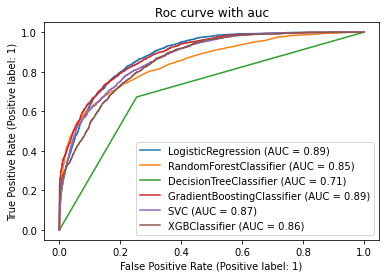

In [565]:
#plotting Roc curve and auc to finding the best model
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(10,10),facecolor='white')
chart= plot_roc_curve(LR,x_test,y_test)
plot_roc_curve(rf,x_test,y_test,ax=chart.ax_)
plot_roc_curve(dt,x_test,y_test,ax=chart.ax_)
plot_roc_curve(gb,x_test,y_test,ax=chart.ax_)
plot_roc_curve(svc,x_test,y_test,ax=chart.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=chart.ax_)
plt.title('Roc curve with auc')
plt.show()

**We will do hyperparameter tuning for the Gradient Boosting Classifier because it has the highest area under the curve of 89% and accuracy of 84% when compared with the other model.**

In [588]:
#hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

gb= GradientBoostingClassifier()
param= {"n_estimators":[5,50,100],
        "max_depth":[3,5,10,13],
        "learning_rate":[0.1,0.5,1],
        "min_samples_leaf":[2,3,5,7],
        "min_samples_split":[2,3,4,5]}

grp= GridSearchCV(gb,param_grid=param)
grp.fit(x_train,y_train)
print(grp.best_params_)

gb= grp.best_estimator_

gb.fit(x_train,y_train)

#predict
y_pred= gb.predict(x_test)

#accuracy score
print("Accuracy\n", accuracy_score(y_test,y_pred))
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy
 0.8325155814878663
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[5038  653]
 [ 610 1240]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5691
           1       0.66      0.67      0.66      1850

    accuracy                           0.83      7541
   macro avg       0.77      0.78      0.78      7541
weighted avg       0.83      0.83      0.83      7541



**The Model gives accuracy score of 84%, which is good improvement. Saving the Trained model.**

In [591]:
#saving our trained model
import pickle
pickle.dump(gb,open('Census_income_prediction.pkl','wb'))